In [1]:
#Install imageio package
!pip install imageio

In [2]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

<ipython-input-8-4816f75472c8>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(img) # Read the image using imageio


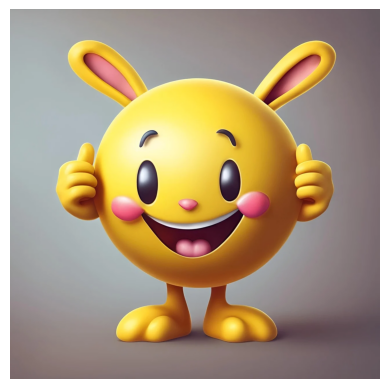

In [8]:
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

# Assuming the image is local, display it using matplotlib
img = "/content/ai-generated-8621512_1280.webp"
image = imageio.imread(img) # Read the image using imageio
plt.imshow(image) # Display using matplotlib's imshow
plt.axis('off')  # Hide axis ticks and labels
plt.show()

# If you intend to fetch the image from a remote server, add the appropriate schema:
# img = "https://example.com/ai-generated-8621512_1280.webp"
# dp.Image(requests.get(img).content) # This should work for remote WEBP images

In [10]:
# Make the image Black and White using the formula Y= 0.299*R + 0.587*G + 0.114*B i.e. applying greyscale
import numpy as np
import imageio # Import imageio to read the image

# Assuming the image is local, use IPython.display.Image directly
img="/content/ai-generated-8621512_1280.webp"

source_img = imageio.imread(img) # Define source_img here by reading the image

def grayscaleimg(rgb):
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)

<ipython-input-10-79b1669e60e4>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  source_img = imageio.imread(img) # Define source_img here by reading the image


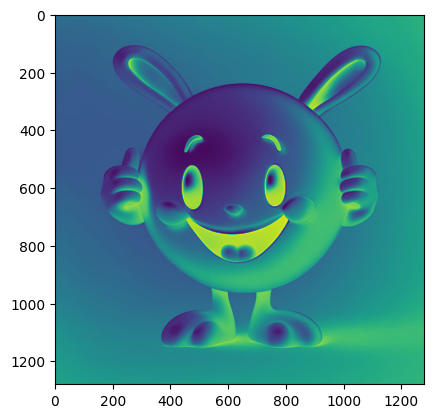

In [11]:
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

<ipython-input-12-7ae4ac11e590>:2: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)


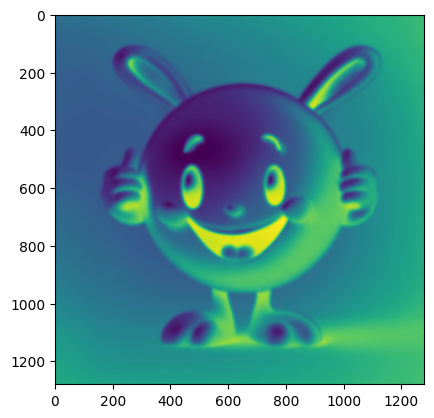

In [12]:
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [13]:
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img)
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [15]:

#Generate the target image by applying the dodge
target_img= dodging(blurred_img, gryscl_img)

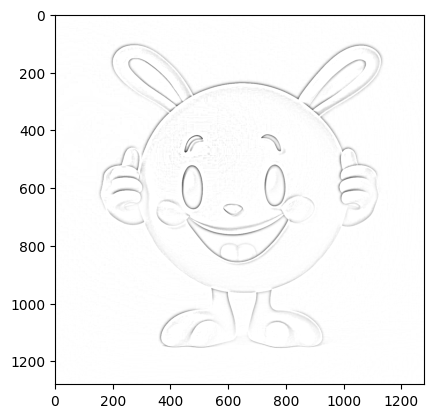

In [16]:

#Display the target image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")